# Exercício AdaBoost e Redes Neurais

Aluno: **Pedro Henrique Rodrigues de Lima**

Pós Graduação Inteligência Artifical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree 


np.set_printoptions(precision=2)


In [2]:
sonar = pd.read_excel('sonar.xlsx', sheet_name=0)

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

class_names = le.classes_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [3]:
sonar.shape

(208, 61)

# 1. Rodando os modelos

## 1.1. Árvore de Decisão

In [4]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print("Classificador Árvore de Decisão:\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clf.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred_clf, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred_clf)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador Árvore de Decisão:

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.79      0.73      0.76        26
       Rocha       0.61      0.69      0.65        16

    accuracy                           0.71        42
   macro avg       0.70      0.71      0.70        42
weighted avg       0.72      0.71      0.72        42

       Mina(prev)  Rocha(prev)
Mina           19            7
Rocha           5           11


## 1.2. AdaBoost

In [5]:
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=42), algorithm="SAMME", n_estimators=5, random_state = 42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm=\"SAMME\", n_estimators=20)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred_ada, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred_ada)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=20)

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.78      0.69      0.73        26
       Rocha       0.58      0.69      0.63        16

    accuracy                           0.69        42
   macro avg       0.68      0.69      0.68        42
weighted avg       0.71      0.69      0.69        42

       Mina(prev)  Rocha(prev)
Mina           18            8
Rocha           5           11


## 1.3. Neural Network

In [6]:

mlp = MLPClassifier(solver='lbfgs', random_state=42, hidden_layer_sizes=[100, 60])
mlp.fit(X_train, y_train)
y_pred_nnet = mlp.predict(X_test)


print("Camadas da rede: {}".format(mlp.n_layers_))
print("Neurônios na camada oculta: {}".format(mlp.hidden_layer_sizes))
print("Neurônios na camada de saída: {}".format(mlp.n_outputs_))
print("Pesos na camada de entrada: {}".format(mlp.coefs_[0].shape))
print("Pesos na camada oculta: {}".format(mlp.coefs_[1].shape))

print("Acurácia da base de treinamento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Acurácia da base de teste: {:.2f}".format(mlp.score(X_test, y_test)))

print(classification_report(y_test, y_pred_nnet, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred_nnet)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Camadas da rede: 4
Neurônios na camada oculta: [100, 60]
Neurônios na camada de saída: 1
Pesos na camada de entrada: (60, 100)
Pesos na camada oculta: (100, 60)
Acurácia da base de treinamento: 1.00
Acurácia da base de teste: 0.83
              precision    recall  f1-score   support

        Mina       0.88      0.85      0.86        26
       Rocha       0.76      0.81      0.79        16

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42

       Mina(prev)  Rocha(prev)
Mina           22            4
Rocha           3           13


# 2. Analisando os resultados

## 2.1.1. Descreva a topologia da rede que foi treinada

Foi treinada uma rede perceptron muticamadas (MLP), com 4 camadas:
1. Camada de inputs (features)
2. Uma "hidden layer" com 100 neurons
3. Uma "hidden layer" com 60 neurons
4. Camada final com a classificação (Saída discreta)

## 2.1.2. Compare o conjunto de regras da árvore de decisão com os modelos previstos pelo AdaBoost.

Plotando a árvore de devisão vemos que geramos uma árvore com 8 níveis, e alguns nós e folhas bem específicos, com poucos elementos (1 ou 2 datapoints, em algumas folhas, por exemplo).

O adaboost, através da combinação de 5 árvores de decisõe conseguiu um resultado pior do que árvore de decisão sozinha, mas como o dataset é pequeno, isso se deve à variações do train-test split, e do random state dos modelos.

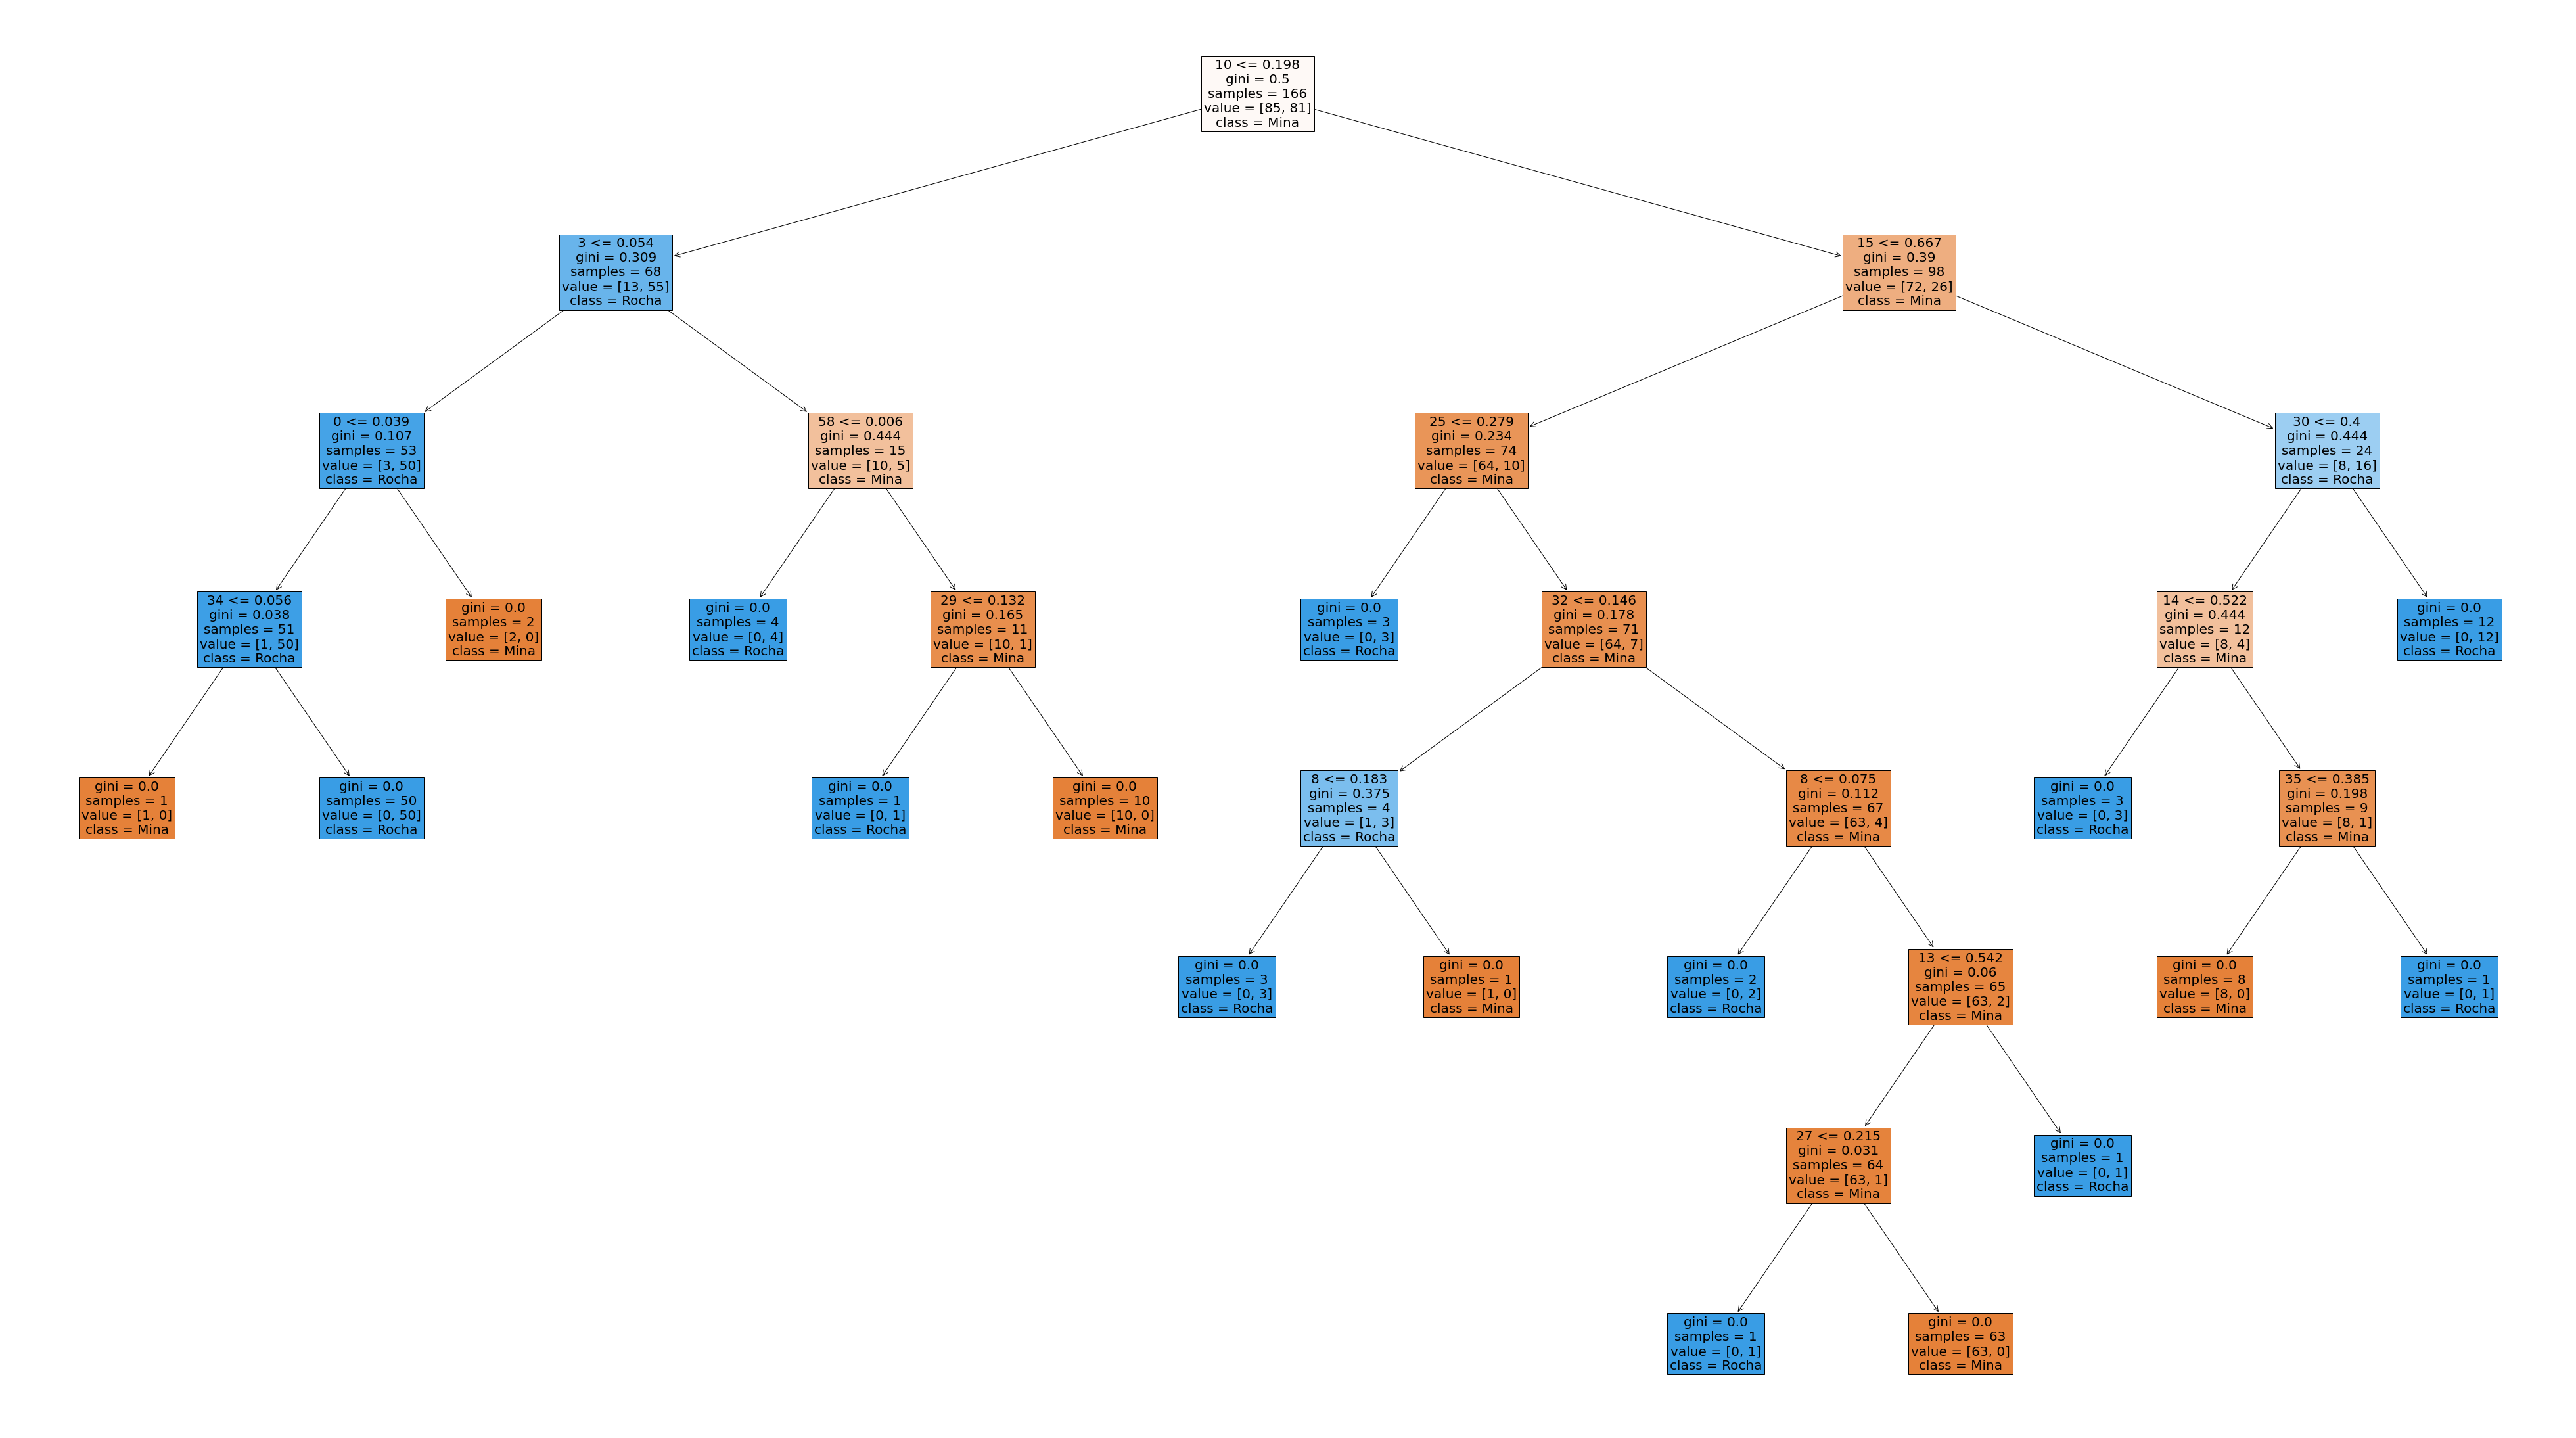

In [7]:
fig1 = plt.figure(figsize = (70,40))
ax1 = fig1.add_subplot()

_ = plot_tree(clf, ax = ax1,fontsize  = 20 ,feature_names = np.arange(0,60), filled = True, class_names = class_names)

## 2.2. Verifique e compare a matriz de confusão e as medidas de performance: acurácia, precisão e revocação, de cada modelo.

Em uma situação de detecção de minas, o número mais importante a ser análisado seria a revocação (recall) da identificação de minas, ou seja, o interesse principal é que todas as minas sejam identificadas corretamente.

Nesse setido, a árvore de decisão e o AdaBoost foram bem parecidos, enquando ao rede neural perceptron multicamadas foi muito melhor, tando no recall de minas, quanto na acurária geral.

A boa performace da rede neural, se deu mesmo com valores diferentes de random states, e se mostrou consistentemente melhor do os outros 2 modelos.

In [8]:
print("Árvore de decisão",'\n',classification_report(y_test, y_pred_clf, target_names=class_names))
print('-----------------------------------------------------')
print("AdaBoost",'\n',classification_report(y_test, y_pred_ada, target_names=class_names))
print('-----------------------------------------------------')
print("Rede Neural MLP",'\n',print(classification_report(y_test, y_pred_nnet, target_names=class_names)))

Árvore de decisão 
               precision    recall  f1-score   support

        Mina       0.79      0.73      0.76        26
       Rocha       0.61      0.69      0.65        16

    accuracy                           0.71        42
   macro avg       0.70      0.71      0.70        42
weighted avg       0.72      0.71      0.72        42

-----------------------------------------------------
AdaBoost 
               precision    recall  f1-score   support

        Mina       0.78      0.69      0.73        26
       Rocha       0.58      0.69      0.63        16

    accuracy                           0.69        42
   macro avg       0.68      0.69      0.68        42
weighted avg       0.71      0.69      0.69        42

-----------------------------------------------------
              precision    recall  f1-score   support

        Mina       0.88      0.85      0.86        26
       Rocha       0.76      0.81      0.79        16

    accuracy                           0.83

## 2.3.1. Analise a interpretabilidade dos modelos.

Apesar de ter apresentado os piores resultados, uma das vantagens da árvore de decisão, é que, nesse tipo de modelo conseguimos entender melhor quais os "aprendizados" e as "decisões" tomadas pelo modelo para realizar a classificação.

Esse tipo de entendimento do modelo não é possível na rede neural.

## 2.3.3 Altere as opções de prunning e preprunning no AdaBoost para criar árvores mais simples, mas que tenham igual poder de previsão.

Reduzindo a complexidade das árvores de decisão, através dos parâmetros max_depth = 4 (diminui a profundidade das árvores, tornando-as menos propensas à orverfitting e mais generalistas), e aumentando a quantidade de ávores para 9, ao invés de 5, conseguimos um modelo muito melhor do que o primeiro AdaBoost treinado.

A revocação (recall) das minas passou de 0.69 para 0.81, e a acurácia geral passou de 0.069 para 0.83.

Ou seja, em geral, uma quantidade maior de classificador fracos, é preferível a uma quantidade menor de classficadores mais complexos. Após esse processo de prunning, os resultados do adaboost ficaram próximos dos resultados da rede neural.

In [9]:
ada2 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 4,random_state=42,min_impurity_decrease=0.01), algorithm="SAMME", n_estimators=9,random_state = 42)
ada2.fit(X_train, y_train)
y_pred_ada2 = ada2.predict(X_test)
print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm=\"SAMME\", n_estimators=20)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred_ada2, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred_ada2)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=20)

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.91      0.81      0.86        26
       Rocha       0.74      0.88      0.80        16

    accuracy                           0.83        42
   macro avg       0.82      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42

       Mina(prev)  Rocha(prev)
Mina           21            5
Rocha           2           14
